# Classifying all malls in CDMX by municipality

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
malls=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\MALLS\DATOS CENTROS Y PLAZAS COMERCIALES.csv")
malls.head()

,ID,TIPO,INST,CALLE,NUMERO,REF,COLONIA,CP,OBS,ALCALDIA,OID
0,1,TIENDAS DEPARTAMENTALES,"SANBORNS HERMANOS, S.A DE C.V.",Insurgentes Sur,2105,Desconocido,Sn. Angel,1000,Desconocido,Álvaro Obregón,1
1,2,TIENDAS DEPARTAMENTALES,Electra,Dr. Galvez,31,Esq. Revolución,Sn. Angel,1000,Desconocido,Álvaro Obregón,2
2,3,TIENDAS DEPARTAMENTALES,"SANBORNS HERMANOS, S.A DE C.V.",Camino Desierto de los Leones,52,Esq. Revolución,Sn. Angel,1000,Desconocido,Álvaro Obregón,3
3,4,PLAZAS COMERCIALES,Desconocido,Insugentes Sur,1971,Entre Río Sn. Angel y Fernando Villapando,Guadalupe Inn.,1020,Desconocido,Álvaro Obregón,4
4,5,CENTRO COMERCIAL,CENTRO COMERCIAL EL RELOX,Insurjentes Sur,2374,Entre Privada Relox y Loreto,Ermita,1070,Desconocido,Álvaro Obregón,5


In [4]:
malls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        832 non-null    int64 
 1   TIPO      832 non-null    object
 2   INST      832 non-null    object
 3   CALLE     832 non-null    object
 4   NUMERO    832 non-null    object
 5   REF       832 non-null    object
 6   COLONIA   832 non-null    object
 7   CP        832 non-null    object
 8   OBS       832 non-null    object
 9   ALCALDIA  832 non-null    object
 10  OID       832 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 71.6+ KB


<Axes: title={'center': 'Sort and number of malls'}>

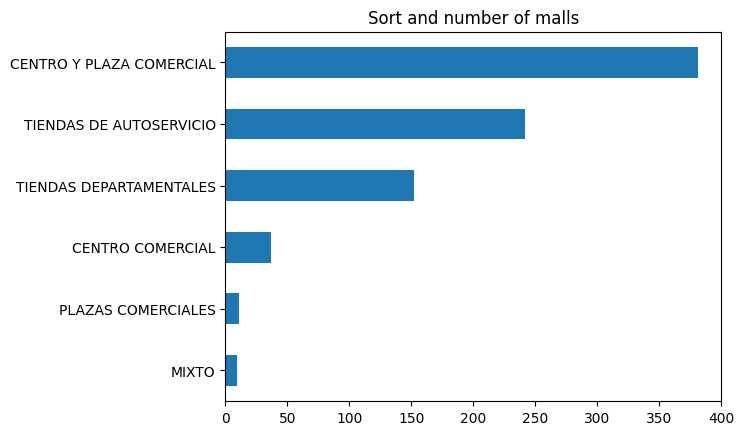

In [5]:
malls.TIPO.value_counts(ascending=True).plot.barh(title="Sort and number of malls")

In [6]:
malls_nbh=malls.groupby("ALCALDIA")
m_nbh={} #number of malls by neighborhood
for nbh, data in malls_nbh:
    m_nbh[nbh] = len(malls_nbh.get_group(nbh))
m_nbh

{'Azcapotzalco': 45,
 'Benito Juárez': 73,
 'Coyoacán': 76,
 'Cuajimalpa': 26,
 'Cuauhtémoc': 172,
 'Gustavo A. Madero': 52,
 'Iztacalco': 22,
 'Iztapalapa': 95,
 'Magdalena Contreras': 11,
 'Miguel Hidalgo': 43,
 'Milpa Alta': 2,
 'Tlahuac': 13,
 'Tlalpan': 75,
 'Venustiano Carranza': 24,
 'Xochimilco': 19,
 'Álvaro Obregón': 84}

In [7]:
malls["Malls_NBH"]=malls["ALCALDIA"]
malls.Malls_NBH=malls.Malls_NBH.map(m_nbh)
malls.sample(5)

,ID,TIPO,INST,CALLE,NUMERO,REF,COLONIA,CP,OBS,ALCALDIA,OID,Malls_NBH
778,786,CENTRO Y PLAZA COMERCIAL,CCENTRO JOYERO MADERO,AV. FRANCISCO I MADERO,54,Desconocido,CENTRO,6000,Desconocido,Cuauhtémoc,786,172
179,180,MIXTO,MANACAR,Avenida de los Insurgentes Sur,1457,Desconocido,Insurgentes Mixcoac,3920,Desconocido,Benito Juárez,180,73
20,21,TIENDAS DE AUTOSERVICIO,COSCO,Boulevard Adolfo López Mateos,1135,Calle 10 y calle 16,SAN PEDRO DE LOS PINOS,1280,Desconocido,Álvaro Obregón,21,84
112,113,CENTRO Y PLAZA COMERCIAL,PLAZA ARENAL,ARENAL,842,Desconocido,SANTA MARÍA TEPEPAN,16020,Desconocido,Xochimilco,113,19
570,572,TIENDAS DE AUTOSERVICIO,Soriana,Retoño,890,Desconocido,El Retoño,9440,Desconocido,Iztapalapa,572,95


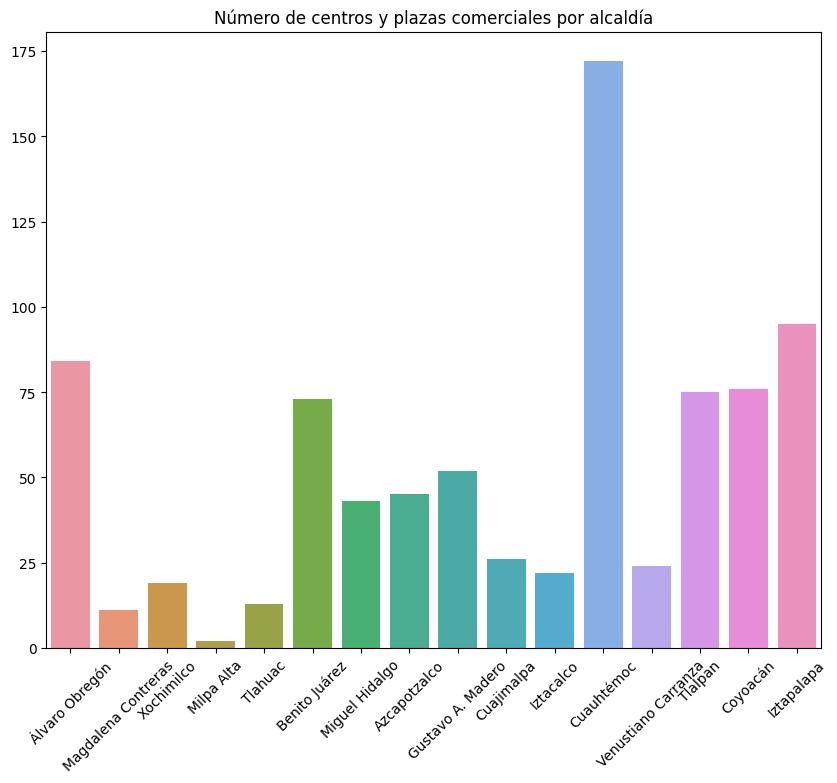

In [8]:
plt.figure(figsize=((10,8)))
fig=sns.barplot(data=malls, x="ALCALDIA", y = "Malls_NBH")
fig.set_title("Número de centros y plazas comerciales por alcaldía")
fig.set_ylabel("")
fig.set_xlabel("")
plt.xticks(rotation=45)
plt.show()

In [9]:
malls_nbh=pd.DataFrame({
    
    "ALCALDÍA": m_nbh.keys(),
    "NUM_MALLS": m_nbh.values()
    
})
malls_nbh.to_csv("Plazas_por_alcandia.csv", index=False)

In [10]:

malls_nbh.to_csv("Plazas_por_alcandia.csv", index=False)